1. Introducción

El propósito de este documento es investigar casos de uso de la librería de Python PyCaret. Además se pondrá un ejemplo de estos y se dará una opinión al respecto del framework en cuestión.


2. PyCaret

PyCaret es una librería de Python que permite llevar a cabo desde la preparación de los datos, hasta el despliegue del modelo final en tan solo unos minutos. Esta librería es compatible con cualquier tipo de notebook de Python, y además nos permite realizar comparaciones de varios modelos automáticamente.

A modo de ejemplo vamos a crear un Jupyter Notebook que sea capaz, en tan solo unas líneas, de leer los datos, procesarlos obteniendo un ranking de modelos de ML, entrenar el modelo más potente y desplegarlo para obtener predicciones sobre datos.

Primero vamos a instalar PyCaret en nuestro entorno de Python, para ello ejecutamos el siguiente comando en una terminal:

Pero antes al leer la documentacion podemos ver que el pycaret solo funciona con python 3.6 ~ 3.8
asi que vamos a crear un entorno virtual con python 3.7

En miniconda prompt escribimos el comando

> conda create -n pycaret python=3.7

y luego instalamos el requirement.txt

In [ ]:
!pip install -r requirements.txt

Hacemos los siguientes imports:

In [53]:
import pandas as pd
import numpy as np
import pycaret
from pycaret.datasets import get_data
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Utilizaremos un conjunto de datos proporcionado por PyCaret llamado ‘credit’, para importarlo corremos el siguiente código

In [6]:
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [10]:
data = get_data('')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [11]:
data.shape

(24000, 24)

Vamos a particionar el conjunto de datos, obteniendo el 95% para entrenar el modelo:

In [14]:
df = data.sample(frac=0.95, random_state=42)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
3111,180000,2,1,2,24,0,0,0,0,0,...,68398.0,70409.0,71408.0,4000.0,2600.0,2000.0,3000.0,2025.0,4791.0,0
18679,180000,2,2,1,32,-1,2,-1,-1,-1,...,1473.0,2705.0,1473.0,0.0,1473.0,1473.0,2705.0,1473.0,1473.0,0
17472,60000,2,2,2,23,0,0,0,0,0,...,59006.0,39578.0,38973.0,2039.0,2250.0,2060.0,1506.0,1500.0,1500.0,0
21451,160000,1,2,1,32,1,2,0,0,0,...,3801.0,2540.0,2279.0,0.0,1094.0,1500.0,0.0,1000.0,0.0,1
20800,650000,2,1,2,29,1,-1,-1,-1,0,...,2482.0,5178.0,5506.0,3000.0,1000.0,2500.0,3500.0,4000.0,3000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,20000,1,2,1,32,2,0,0,2,0,...,19362.0,19402.0,19607.0,2000.0,3000.0,0.0,850.0,920.0,750.0,1
13226,10000,1,3,1,30,1,2,0,0,0,...,7637.0,6056.0,2852.0,0.0,1176.0,1000.0,121.0,57.0,5507.0,1
6783,230000,2,3,1,44,-1,-1,-1,-1,-1,...,6222.0,15121.0,17425.0,11632.0,4987.0,6222.0,15121.0,17425.0,17007.0,0
3600,100000,2,2,2,23,0,0,0,0,0,...,18306.0,20594.0,26368.0,1258.0,1255.0,3000.0,3000.0,7000.0,1225.0,0


El 5% restante lo vamos a utilizar para comprobar el rendimiento del modelo sobre datos nunca antes vistos:

In [16]:
df_unseen = data.drop(df.index)
df_unseen

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
9,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517.0,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0
55,80000,1,1,2,31,-1,-1,-1,-1,-1,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,390.0,0
77,90000,1,2,2,35,0,0,0,0,0,...,35565.0,30942.0,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0,0
117,80000,2,2,1,23,1,2,3,2,0,...,9898.0,10123.0,12034.0,1650.0,0.0,0.0,379.0,2091.0,1.0,0
126,30000,1,1,2,41,2,2,2,2,2,...,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,0.0,1200.0,1250.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23860,150000,1,5,1,36,0,0,0,0,0,...,136378.0,139219.0,142172.0,5500.0,3800.0,3900.0,4000.0,4100.0,4100.0,0
23864,10000,1,3,1,42,2,2,0,0,2,...,9926.0,8898.0,7667.0,0.0,1200.0,1500.0,0.0,1000.0,3000.0,1
23897,140000,1,2,1,34,0,0,0,0,0,...,44433.0,28029.0,32386.0,4000.0,5000.0,5000.0,5000.0,5000.0,10000.0,0
23930,410000,1,1,2,34,0,0,0,-1,-1,...,1467.0,1421.0,-15.0,17259.0,18600.0,1474.0,1428.0,0.0,0.0,1


Como podemos ver, tenemos varios predictores que se utilizarán para predecir la variable binaria ‘default’.

Lo último que haremos para limpiar los datos es resetear los índices de cada subconjunto de datos:

In [17]:
df.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

Ahora vamos a comparar el rendimiento de distintos modelos. Para ello debemos, en primer lugar, importar

In [18]:
from pycaret import *

Paso seguido definimos el entorno de PyCaret con los datos de entrenamiento, esto hará que cada vez que llamemos a un modelo a entrenar se escojan dichos datos para entrenar. Además este proceso también preprocesa los datos automáticamente de manera que sea más fácil aplicar los modelos estadísticos:

In [19]:
model_setup = setup(data=df, target='default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Vemos como la ejecución de esta consulta es interactiva, pues espera que comprobemos que los tipos de datos inferidos automáticamente sean los correctos, en tal caso pulsamos enter. Entonces se nos mostrarán los cambios realizados a los datos de entrenamiento que hemos realizado

Podemos ver los modelos de clasificación de que dispone PyCaret, mediante el siguiente comando:

In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Este output es importante puesto que se necesitan los id de cada modelo para trabajar con ellos más en específico, como veremos a continuación.

Una de las funciones más útiles de esta librería nos permite comparar todos los modelos anteriores, esta función es la siguiente:

In [21]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8205,0.7634,0.3743,0.6633,0.4782,0.3799,0.4027,0.1430
lightgbm,Light Gradient Boosting Machine,0.8196,0.7756,0.3718,0.6605,0.4754,0.3767,0.3995,0.0720
ridge,Ridge Classifier,0.8185,0.0000,0.3515,0.6660,0.4599,0.3632,0.3901,0.0240
gbc,Gradient Boosting Classifier,0.8180,0.7788,0.3555,0.6608,0.4621,0.3643,0.3898,0.7090
ada,Ada Boost Classifier,0.8141,0.7713,0.3219,0.6597,0.4323,0.3366,0.3678,0.1780
rf,Random Forest Classifier,0.8130,0.7644,0.3635,0.6299,0.4609,0.3575,0.3773,0.4060
et,Extra Trees Classifier,0.8063,0.7421,0.3664,0.5984,0.4544,0.3448,0.3602,0.4310
dummy,Dummy Classifier,0.7799,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
lr,Logistic Regression,0.7798,0.6376,0.0000,0.0000,0.0000,-0.0001,-0.0013,0.6420
knn,K Neighbors Classifier,0.7513,0.6105,0.1859,0.3704,0.2471,0.1176,0.1278,0.3730


Mediante esta tabla podemos escoger el modelo que más nos convenga, teniendo en cuenta las diferentes puntuaciones sobre las métricas que se muestran.

En nuestro caso, por ejemplo vamos a construir y entrenar un random forest sobre los datos de entrenamiento. Para ello ejecutamos:

In [22]:
rf = create_model('')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.7765,0.3675,0.6293,0.4640,0.3603,0.3794
1,0.8120,0.7671,0.3561,0.6281,0.4545,0.3513,0.3720
2,0.8102,0.7696,0.3504,0.6212,0.4481,0.3440,0.3646
3,0.8108,0.7632,0.3590,0.6207,0.4549,0.3501,0.3694
4,0.8233,0.7774,0.3960,0.6651,0.4964,0.3975,0.4172
5,0.8120,0.7398,0.3533,0.6294,0.4526,0.3497,0.3710
6,0.8189,0.7769,0.3864,0.6507,0.4848,0.3835,0.4027
7,0.8083,0.7599,0.3494,0.6150,0.4457,0.3402,0.3601
8,0.8170,0.7625,0.3864,0.6415,0.4823,0.3794,0.3974


In [23]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Podemos ver como ha entrenado 10 modelos distintos, para poder obtener los detalles de este modelo en media y, así, poder extrapolar los resultados en mayor detalle. También se pueden ver los hiperparámetros con los que el modelo ha sido entrenado.

Para mejorar este modelo, es decir, obtener los hiperparámetros óptimos o que más se aproximan a estos, podemos correr la siguiente función, que entrena 10 modelos distintos 10 veces cada uno, y devuelve el que mejor precisión media obtenga:

In [25]:
tunned_rf = tune_model()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8152,0.7429,0.3276,0.6609,0.4381,0.3422,0.3724
1,0.8095,0.7367,0.2906,0.6497,0.4016,0.3074,0.3427
2,0.8127,0.7242,0.3419,0.6383,0.4453,0.3447,0.3691
3,0.8127,0.7584,0.3618,0.6287,0.4593,0.3558,0.3757
4,0.8239,0.7638,0.3675,0.6862,0.4787,0.3842,0.4113
5,0.8164,0.7378,0.3020,0.6883,0.4198,0.3299,0.3696
6,0.8271,0.7474,0.4432,0.6610,0.5306,0.4296,0.4425
7,0.8020,0.7346,0.3097,0.5989,0.4082,0.3035,0.3274
8,0.8183,0.7543,0.3523,0.6667,0.4610,0.3640,0.3908


In [26]:
print(tunned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


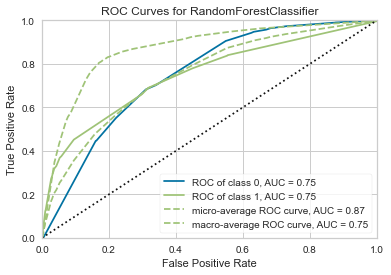

In [27]:
plot_model(tunned_rf,plot='auc')

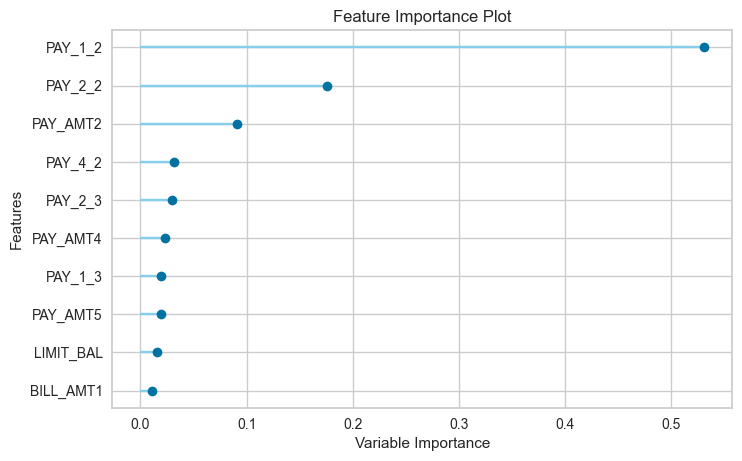

In [28]:
plot_model(tunned_rf, plot='feature')

Llegados a este punto, podemos obtener predicciones sobre el conjunto de datos test, que no ha sido utilizado para entrenar el modelo:

In [29]:
unseen_prediction = predict_model(tunned_rf, data=df_unseen)
unseen_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8300,0.7289,0.3135,0.7182,0.4365,0.3540,0.3964


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,260000,2,1,2,51,-1,-1,-1,-1,-1,...,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0,0,0.9119
1,80000,1,1,2,31,-1,-1,-1,-1,-1,...,390.0,0.0,390.0,390.0,390.0,390.0,390.0,0,0,0.7608
2,90000,1,2,2,35,0,0,0,0,0,...,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0,0,0,0.9119
3,80000,2,2,1,23,1,2,3,2,0,...,12034.0,1650.0,0.0,0.0,379.0,2091.0,1.0,0,0,0.6620
4,30000,1,1,2,41,2,2,2,2,2,...,28321.0,3500.0,0.0,2200.0,0.0,1200.0,1250.0,0,1,0.7846


Como podemos ver, se crean dos columnas nuevas. Label hace referencia a la predicción realizada mientras que Score es la probabilidad asociada a la predicción.

Por último, para terminar de configurar nuestro modelo random forest, debemos finalizar el modelo, es decir, se va a entrenar con todo el conjunto de datos del que se dispone:

In [30]:
final_rf = finalize_model(tunned_rf)
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


De esta manera, el modelo está listo para su puesta en producción, por tanto podemos guardarlo localmente mediante:

In [31]:
save_model(final_rf, 'modelo_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

-------------------------------

In [32]:
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [35]:
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y= data['Price'], facet_col=data['Cut'], opacity= 0.25, template= 'plotly_dark', trendline_color_override= 'red', title='Diamonds')
fig.show();

In [36]:
fig = px.histogram(data, x=["Price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()

In [38]:
data_copy = data.copy()
data_copy['Log_Price'] = np.log(data['Price'])
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgrama Log Price', template = 'plotly_dark')
fig.show()

In [42]:
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

,Description,Value
0,session_id,7718
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [46]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,616.9702,1807850.1049,1310.5868,0.9813,0.0667,0.0487,0.0250
gbr,Gradient Boosting Regressor,747.0511,2227739.2755,1480.4029,0.9768,0.0768,0.0575,0.0430
et,Extra Trees Regressor,726.4378,2335184.3112,1497.5998,0.9766,0.0802,0.0586,0.1350
rf,Random Forest Regressor,724.8577,2397650.2925,1521.6337,0.9760,0.0791,0.0574,0.1240
dt,Decision Tree Regressor,945.3426,4265818.6306,2050.7280,0.9563,0.1046,0.0745,0.0110
ada,AdaBoost Regressor,2026.6157,17666468.2102,4157.0863,0.8242,0.1916,0.1545,0.0420
knn,K Neighbors Regressor,3011.4195,37040854.0762,6037.7178,0.6296,0.3630,0.2308,0.0300
omp,Orthogonal Matching Pursuit,3385.4745,96983831.3758,9646.1306,-0.0268,0.2871,0.2262,0.2040
llar,Lasso Least Angle Regression,6379.0775,111358175.0532,10504.5101,-0.1220,0.7072,0.5563,0.3760
lasso,Lasso Regression,6379.0778,111358202.6043,10504.5111,-0.1220,0.7072,0.5563,0.0110


In [44]:
plot_model(best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

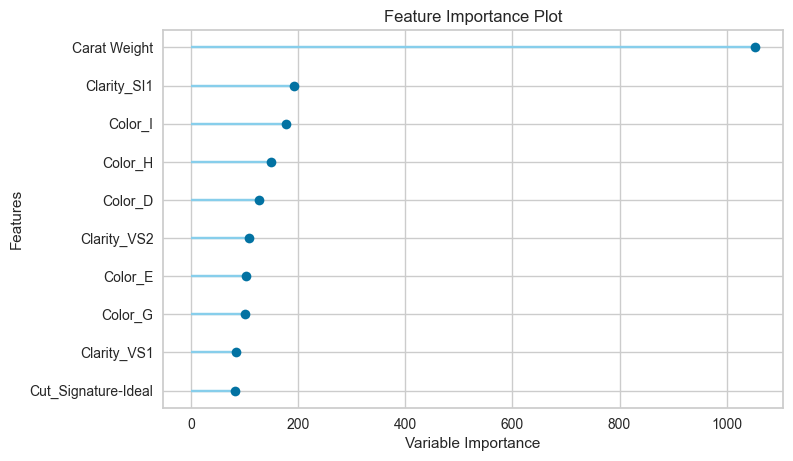

In [45]:
plot_model(best, plot = 'feature')


In [47]:
final_best = finalize_model(best)
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    

--------------------

In [55]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
s = setup(data, target='species', session_id= 123)

,Description,Value
0,session_id,123
1,Target,species
2,Original Data,"(150, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(104, 4)"


In [57]:
eda()

Shape of your Data Set loaded: (150, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################


Row
    [0] WidgetBox
        [0] Select(name='y', options=['sepal_length', ...], value='sepal_length')
    [1] ParamFunction(function)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['sepal_length', ...], value='sepal_length')
        [1] Select(name='Y-Axis', options=['sepal_length', ...], value='sepal_width')
        [2] Select(name='Color', options=['None', 'species'], value='None')
    [1] ParamFunction(function)

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['petal_length', ...], value='petal_length', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Layout)

HoloViews(Overlay)

Time to run AutoViz (in seconds) = 2
